In [86]:
import pandas as pd

## question 1
Which U.S. states have the highest and lowest firearm background-check rates per capita, and how are these rates associated with median household income?

### Set up DS

In [84]:
df_gun = pd.read_csv('gun_data.csv')

In [107]:
df_census = pd.read_csv('US_Census_Data.csv')

### Explore Data

#### Explore Data: Gun Data

##### Gun Head

In [ ]:
df_gun.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


##### Gun Tail

In [94]:
df_gun.tail(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


##### Gun Info

In [95]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

##### Gun Describe

In [96]:
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


##### State Totals

In [ ]:
# pull columns
gun_totals = df_gun[['state', 'totals']]
# group totals by state and sum the group
gun_totals_group = gun_totals.groupby(by=['state']).sum();
# check head of group
gun_totals_group.head(5)
# check shape of group
gun_totals_group.shape

### Explore Data: Census Data

#### Census Head

In [114]:
df_census.head(5)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


#### Census Info

In [109]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

#### Census Describe

In [110]:
df_census.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Population estimates, July 1, 2016, (V2016)",(c),"4,863,300",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,865454,0.048,50.40%,2.50%,1.90%,"8,411,808","7,288,000",1.50%,"5,778,708",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


#### Census Shape

In [111]:
df_census.shape

(85, 52)

#### Pull median household income row

In [112]:
df_census_median_household_income = df_census.iloc[[47]]

In [113]:
df_census_median_household_income

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
47,"Median household income (in 2015 dollars), 201...",NaN,"$43,623","$72,515","$50,255","$41,371","$61,818","$60,629","$70,331","$60,509",...,50957,45219,"$53,207","$60,727","$55,176","$65,015","$61,062","$41,751","$53,357","$58,840"


## Merge the data sets together

In [19]:
# check shape of gun ds
gun_totals_group.shape

(1, 55)

In [20]:
# check shape of census ds
df_census_median_household_income.shape

(1, 52)

In [21]:
# check info of both sets
gun_totals_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, totals to totals
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Alabama               1 non-null      int64
 1   Alaska                1 non-null      int64
 2   Arizona               1 non-null      int64
 3   Arkansas              1 non-null      int64
 4   California            1 non-null      int64
 5   Colorado              1 non-null      int64
 6   Connecticut           1 non-null      int64
 7   Delaware              1 non-null      int64
 8   District of Columbia  1 non-null      int64
 9   Florida               1 non-null      int64
 10  Georgia               1 non-null      int64
 11  Guam                  1 non-null      int64
 12  Hawaii                1 non-null      int64
 13  Idaho                 1 non-null      int64
 14  Illinois              1 non-null      int64
 15  Indiana               1 non-null      int64
 16  Iowa   

In [22]:
# need to drop columns from the gun ds
gun_totals_group = gun_totals_group.drop(columns=['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands'])

In [23]:
gun_totals_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, totals to totals
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Alabama         1 non-null      int64
 1   Alaska          1 non-null      int64
 2   Arizona         1 non-null      int64
 3   Arkansas        1 non-null      int64
 4   California      1 non-null      int64
 5   Colorado        1 non-null      int64
 6   Connecticut     1 non-null      int64
 7   Delaware        1 non-null      int64
 8   Florida         1 non-null      int64
 9   Georgia         1 non-null      int64
 10  Hawaii          1 non-null      int64
 11  Idaho           1 non-null      int64
 12  Illinois        1 non-null      int64
 13  Indiana         1 non-null      int64
 14  Iowa            1 non-null      int64
 15  Kansas          1 non-null      int64
 16  Kentucky        1 non-null      int64
 17  Louisiana       1 non-null      int64
 18  Maine           1 non-null   

In [24]:
df_census_median_household_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 47 to 47
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            1 non-null      object
 1   Fact Note       0 non-null      object
 2   Alabama         1 non-null      object
 3   Alaska          1 non-null      object
 4   Arizona         1 non-null      object
 5   Arkansas        1 non-null      object
 6   California      1 non-null      object
 7   Colorado        1 non-null      object
 8   Connecticut     1 non-null      object
 9   Delaware        1 non-null      object
 10  Florida         1 non-null      object
 11  Georgia         1 non-null      object
 12  Hawaii          1 non-null      object
 13  Idaho           1 non-null      object
 14  Illinois        1 non-null      object
 15  Indiana         1 non-null      object
 16  Iowa            1 non-null      object
 17  Kansas          1 non-null      object
 18  Kentucky    

In [25]:
# need to drop columns from the 2nd table to match the 1st
df_census_median_household_income = df_census_median_household_income.drop(columns=['Fact', 'Fact Note'])

In [26]:
df_census_median_household_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 47 to 47
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Alabama         1 non-null      object
 1   Alaska          1 non-null      object
 2   Arizona         1 non-null      object
 3   Arkansas        1 non-null      object
 4   California      1 non-null      object
 5   Colorado        1 non-null      object
 6   Connecticut     1 non-null      object
 7   Delaware        1 non-null      object
 8   Florida         1 non-null      object
 9   Georgia         1 non-null      object
 10  Hawaii          1 non-null      object
 11  Idaho           1 non-null      object
 12  Illinois        1 non-null      object
 13  Indiana         1 non-null      object
 14  Iowa            1 non-null      object
 15  Kansas          1 non-null      object
 16  Kentucky        1 non-null      object
 17  Louisiana       1 non-null      object
 18  Maine       

In [27]:
gun_totals_group.shape

(1, 50)

In [28]:
df_census_median_household_income.shape

(1, 50)

In [29]:
# Need to transpose both tables to have 1 col with 50 rows each
gun_totals_group = gun_totals_group.T
df_census_median_household_income = df_census_median_household_income.T

In [30]:
gun_totals_group.shape

(50, 1)

In [31]:
df_census_median_household_income.shape

(50, 1)

In [32]:
df_census_median_household_income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   47      50 non-null     object
dtypes: object(1)
memory usage: 2.8+ KB


In [33]:
gun_totals_group = gun_totals_group.rename(columns={'totals': 'bgChecks'})
gun_totals_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   bgChecks  50 non-null     int64
dtypes: int64(1)
memory usage: 2.8+ KB


In [34]:
gun_totals_group.head()

,bgChecks
state,
Alabama,6706079
Alaska,1137643
Arizona,4425714
Arkansas,3752633
California,19014063


In [35]:
df_census_median_household_income.head()

,47
Alabama,"$43,623"
Alaska,"$72,515"
Arizona,"$50,255"
Arkansas,"$41,371"
California,"$61,818"


In [36]:
df_census_median_household_income.columns

Int64Index([47], dtype='int64')

In [37]:
df_census_median_household_income = df_census_median_household_income.reset_index()

In [38]:
df_census_median_household_income.columns

Index(['index', 47], dtype='object')

In [39]:
df_census_median_household_income = df_census_median_household_income.rename(columns={'index': 'state', 47: 'income'})

In [40]:
df_census_median_household_income.columns

Index(['state', 'income'], dtype='object')

In [41]:
df_census_gun = gun_totals_group.merge(df_census_median_household_income, how='inner', on='state')

In [42]:
df_census_gun = df_census_gun.loc[:, ['state', 'bgChecks', 'income']]

In [43]:
df_census_gun['income'] = (
    df_census_gun['income'].astype(str).str.replace(r'[^\d,]', '', regex=True))

In [44]:
df_census_gun['income'] = (
    df_census_gun['income'].str.replace(',', '').astype(int))

In [45]:
df_census_gun['income'] = df_census_gun['income'].apply(lambda x: f"${x:,.0f}")

In [46]:
df_census_gun.style.format({'bgChecks': '{:,}'})

,state,bgChecks,income
0,Alabama,"6,706,079","$43,623"
1,Alaska,"1,137,643","$72,515"
2,Arizona,"4,425,714","$50,255"
3,Arkansas,"3,752,633","$41,371"
4,California,"19,014,063","$61,818"
5,Colorado,"6,058,482","$60,629"
6,Connecticut,"3,168,126","$70,331"
7,Delaware,"491,369","$60,509"
8,Florida,"11,695,777","$47,507"
9,Georgia,"7,209,942","$49,620"


In [47]:
# clean data so that it is numeric
df_census_gun['bgChecks_num'] = (
    df_census_gun['bgChecks']
    .astype(str)
    .str.replace(',', '', regex=False)
    .astype(int)
)

df_census_gun['income_num'] = (
    df_census_gun['income']
    .astype(str)
    .str.replace('[\$,]', '', regex=True)
    .astype(int)
)

#### option 2 with 2 charts

<AxesSubplot:title={'center':'Median Income by State'}, ylabel='state'>

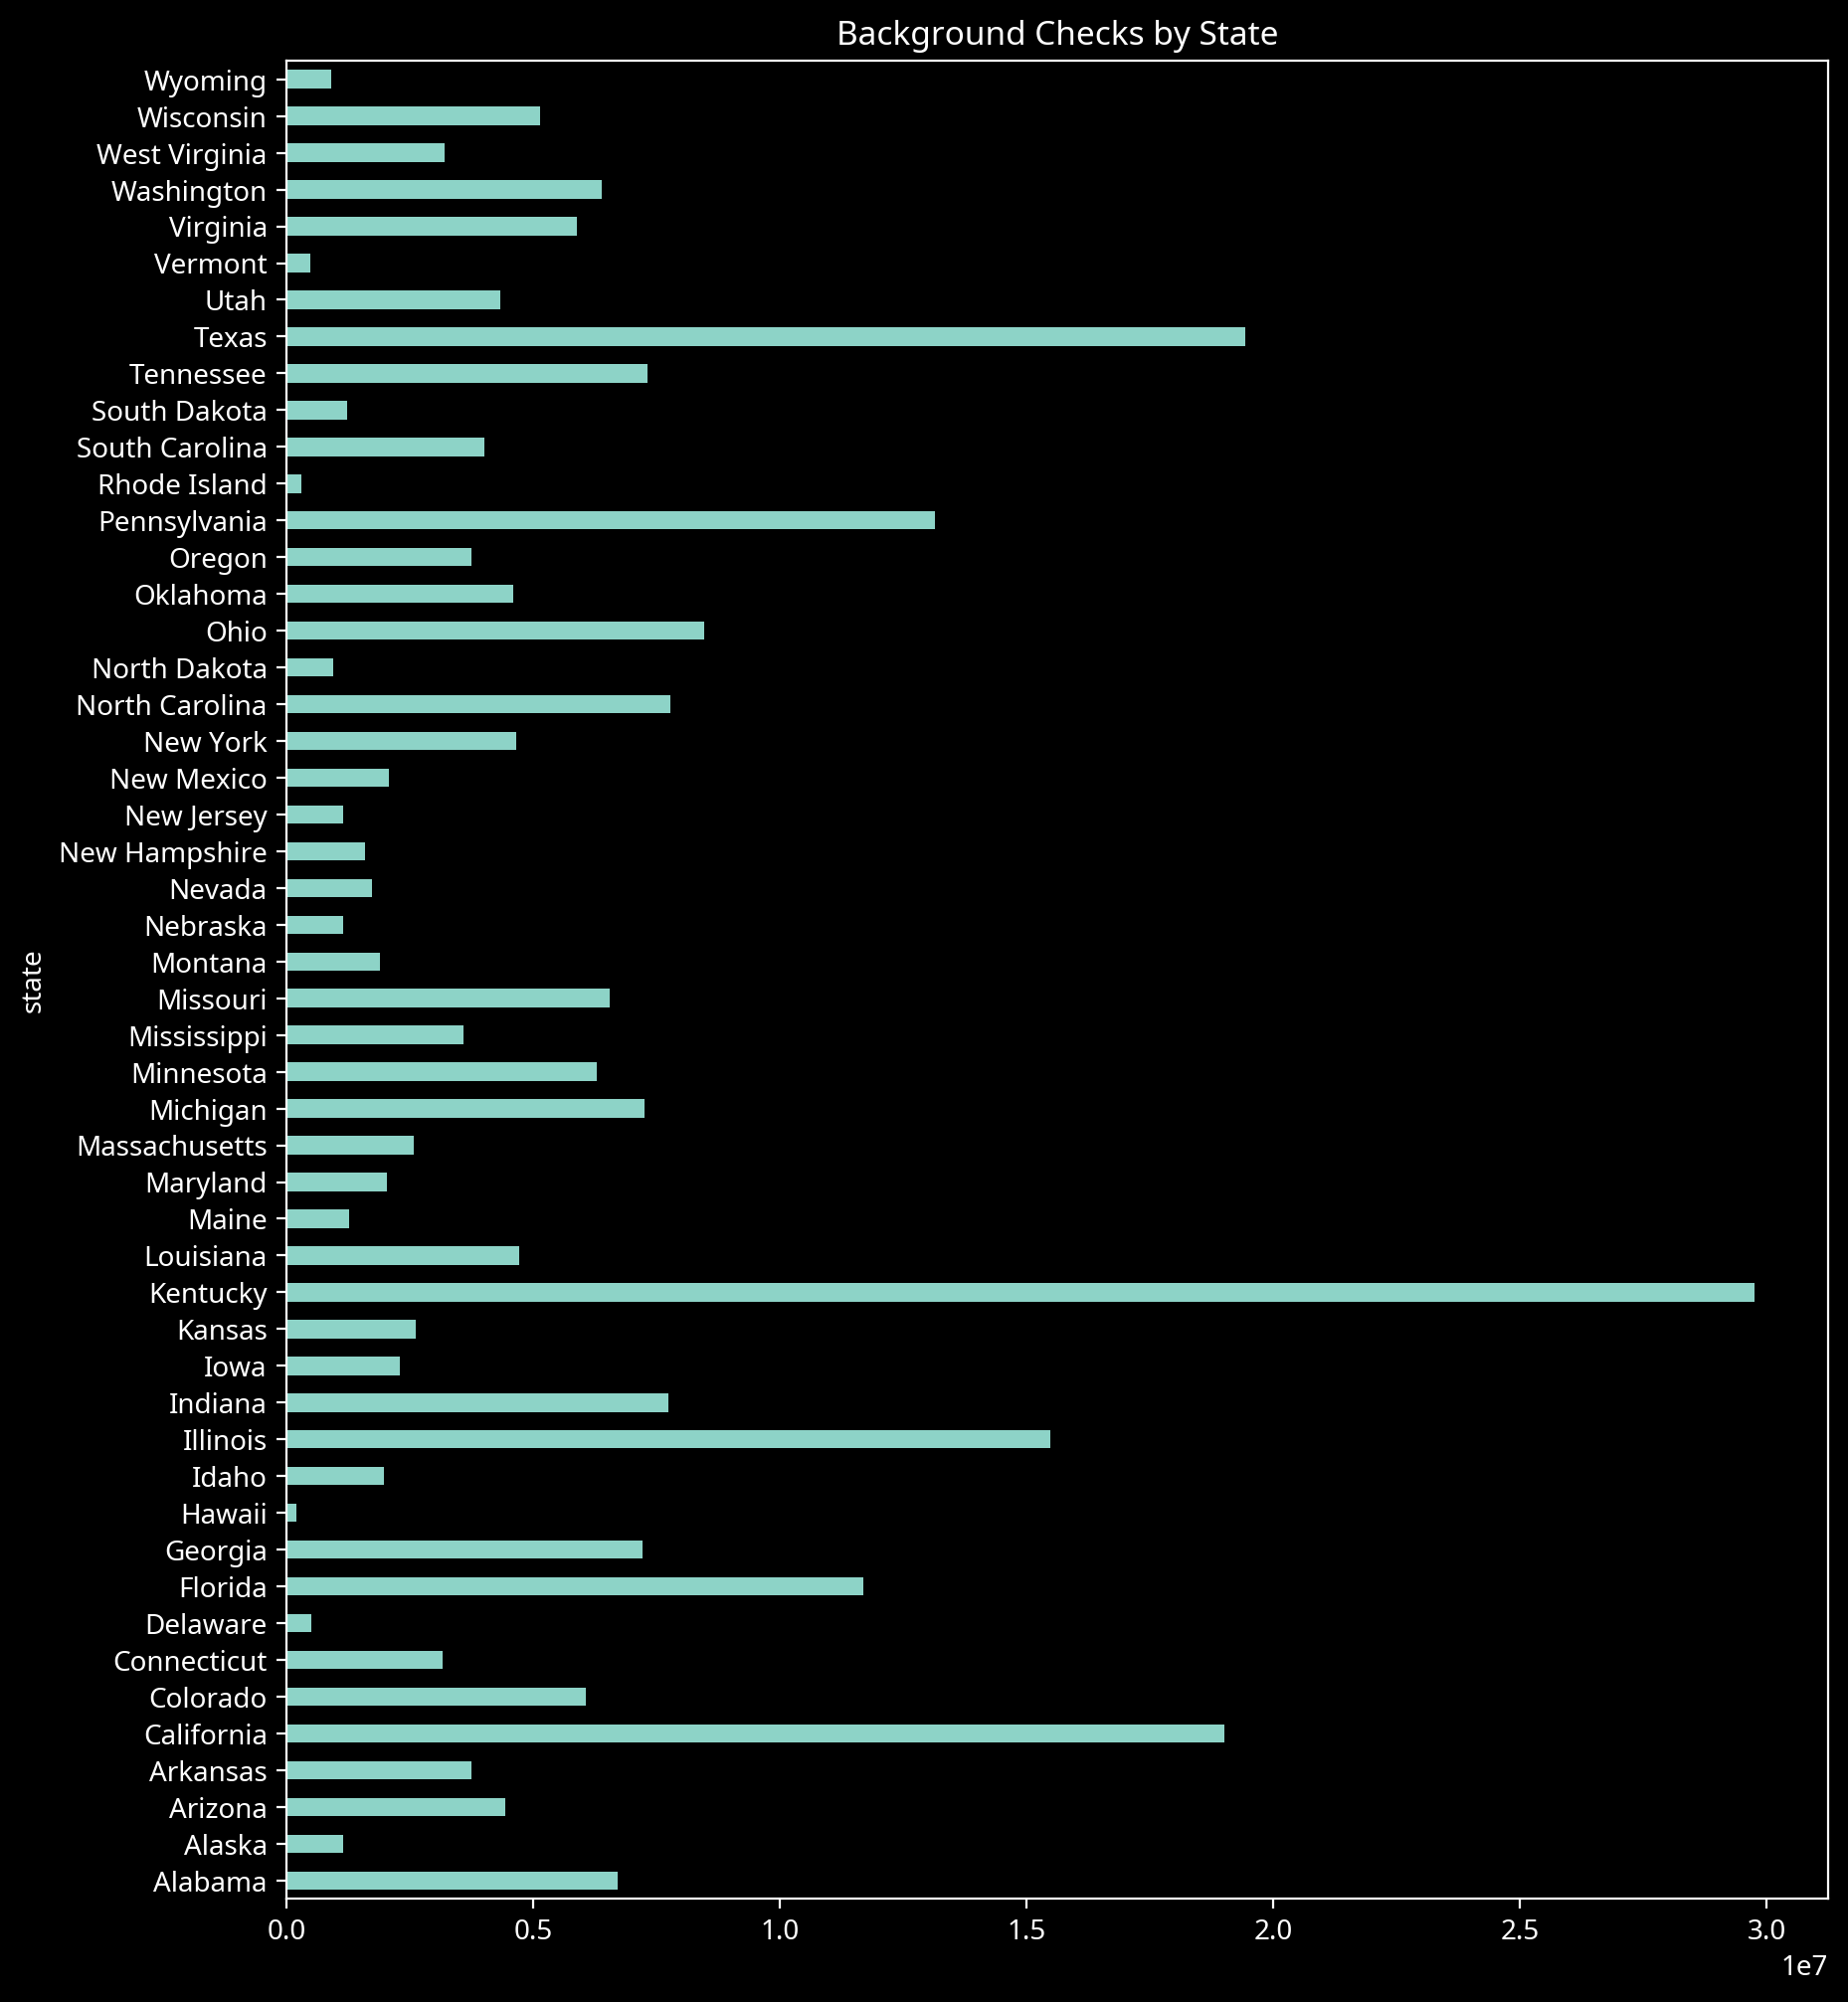

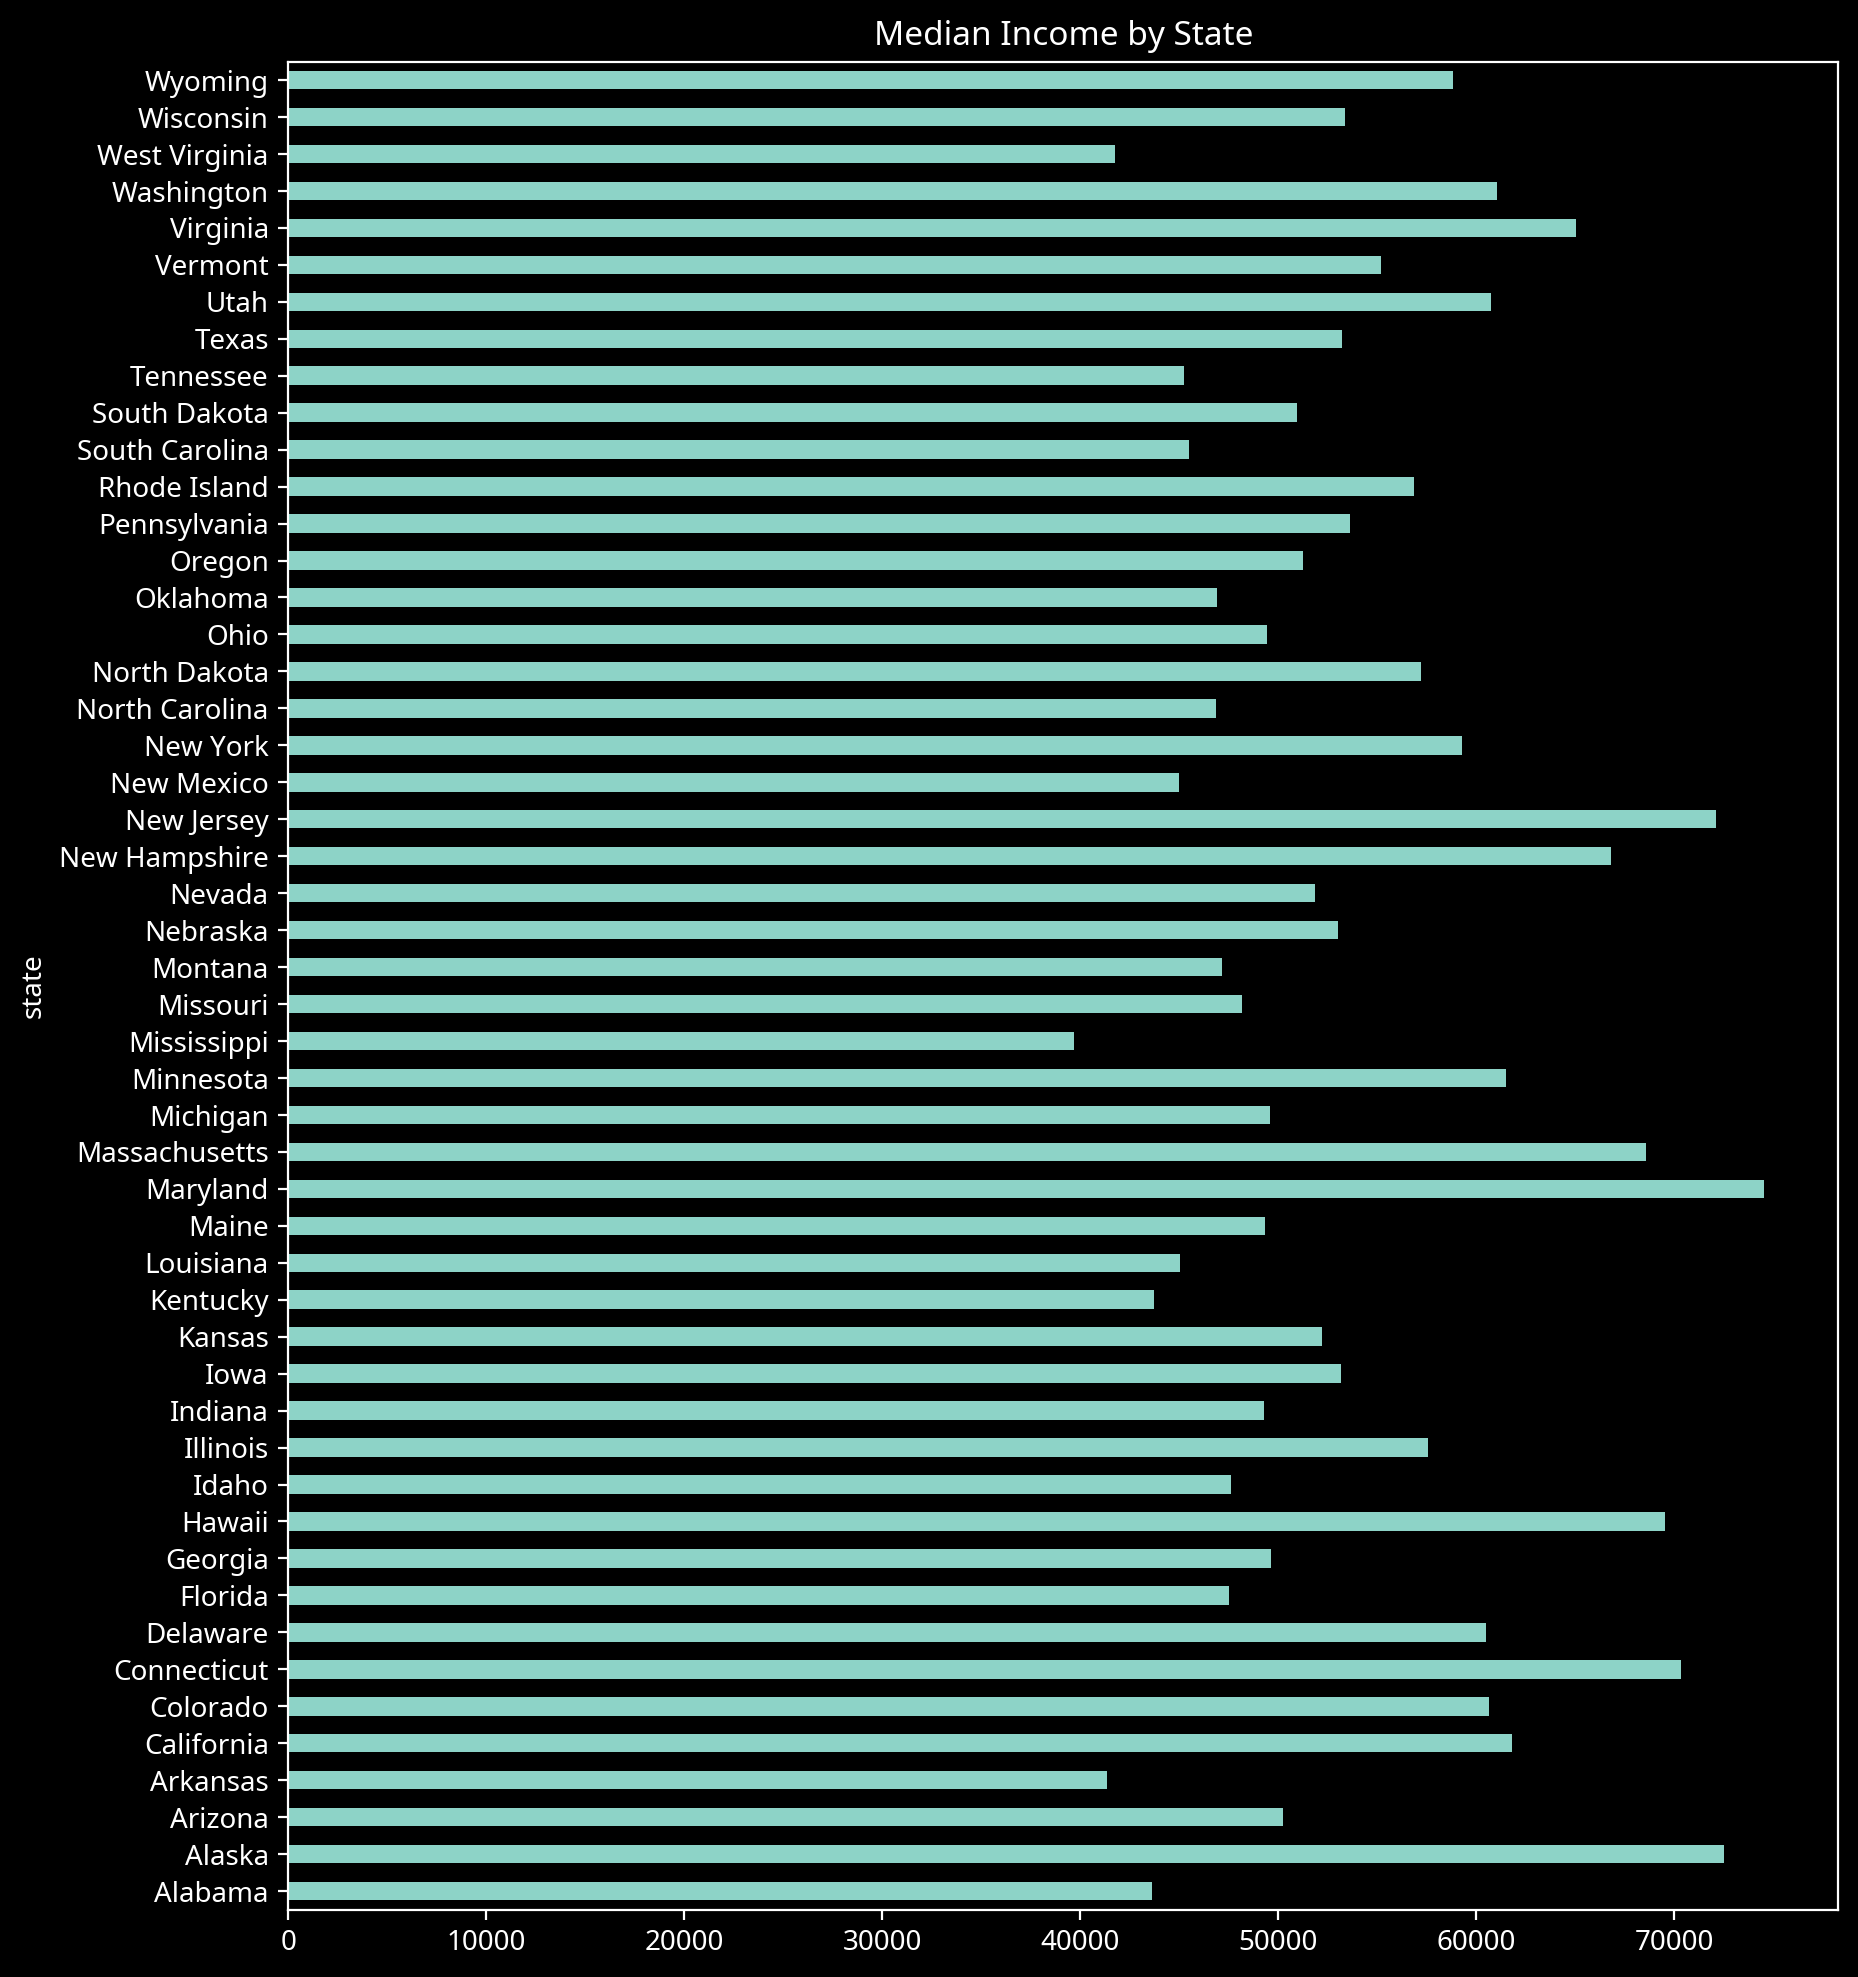

In [48]:
df_census_gun.plot(
    kind='barh',
    x='state',
    y='bgChecks_num',
    legend=False,
    figsize=(10, 12),
    title='Background Checks by State'
)

df_census_gun.plot(
    kind='barh',
    x='state',
    y='income_num',
    legend=False,
    figsize=(10, 12),
    title='Median Income by State'
)

#### new chart that shows five states with both bars side by side 

In [49]:
df_census_gun['state']

0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
5           Colorado
6        Connecticut
7           Delaware
8            Florida
9            Georgia
10            Hawaii
11             Idaho
12          Illinois
13           Indiana
14              Iowa
15            Kansas
16          Kentucky
17         Louisiana
18             Maine
19          Maryland
20     Massachusetts
21          Michigan
22         Minnesota
23       Mississippi
24          Missouri
25           Montana
26          Nebraska
27            Nevada
28     New Hampshire
29        New Jersey
30        New Mexico
31          New York
32    North Carolina
33      North Dakota
34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              Utah
44           Vermont
45          Virginia
46        Washington
47     West V

In [4]:
subset = df_census_gun.iloc[[4, 8, 31, 42]].copy()

In [5]:
subset['bg_norm'] = (subset['bgChecks_num'] - subset['bgChecks_num'].min()) / \
                    (subset['bgChecks_num'].max() - subset['bgChecks_num'].min())

subset['income_norm'] = (subset['income_num'] - subset['income_num'].min()) / \
                        (subset['income_num'].max() - subset['income_num'].min())

# Reduce the income bar height slightly for visual clarity
subset['income_norm_adj'] = subset['income_norm'] * 0.8

<AxesSubplot:title={'center':'Normalized Background Checks vs Median Income (Adjusted)'}, xlabel='state'>

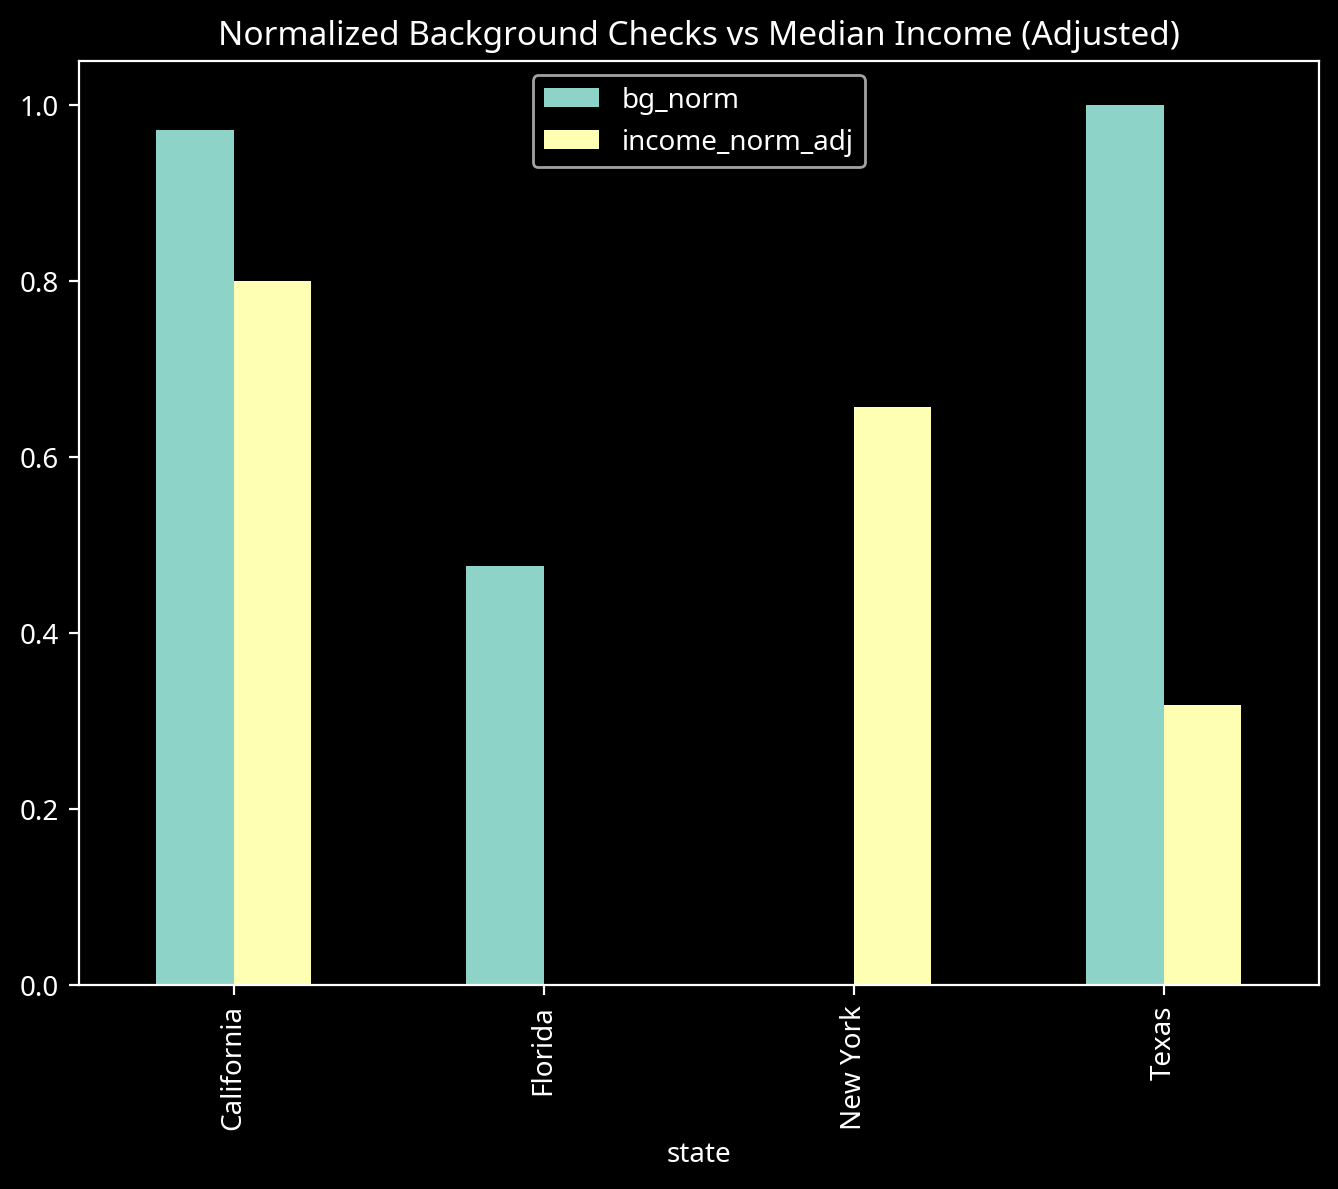

In [6]:
subset.plot(
    kind='bar',
    x='state',
    y=['bg_norm', 'income_norm_adj'],
    figsize=(8,6),
    title='Normalized Background Checks vs Median Income (Adjusted)'
)

### second question

How have firearm background-check totals changed over time across U.S. states, and which states exhibit the biggest increase?

In [53]:
# consolidate data 
df_gun_q2 = df_gun[['month', 'state', 'totals']]

In [54]:
gun_q2_group = df_gun_q2.groupby(['state', 'month'])['totals'].sum().reset_index()

In [55]:
# issue here

In [56]:
gun_q2_group.head()

,state,month,totals
0,Alabama,1998-11,1062
1,Alabama,1998-12,35506
2,Alabama,1999-01,18049
3,Alabama,1999-02,20583
4,Alabama,1999-03,19424


In [57]:
gun_q2_group.dtypes

state     object
month     object
totals     int64
dtype: object

In [58]:
gun_q2_group['month'] = pd.to_datetime(gun_q2_group['month'])

In [59]:
gun_q2_group.dtypes

state             object
month     datetime64[ns]
totals             int64
dtype: object

In [60]:
gun_q2_group.head(50)

,state,month,totals
0,Alabama,1998-11-01,1062
1,Alabama,1998-12-01,35506
2,Alabama,1999-01-01,18049
3,Alabama,1999-02-01,20583
4,Alabama,1999-03-01,19424
5,Alabama,1999-04-01,14823
6,Alabama,1999-05-01,14043
7,Alabama,1999-06-01,14651
8,Alabama,1999-07-01,14795
9,Alabama,1999-08-01,17095


In [61]:
gun_q2_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   state   12485 non-null  object        
 1   month   12485 non-null  datetime64[ns]
 2   totals  12485 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 292.7+ KB


In [62]:
gun_q2_group['state'][500]

'Arizona'

In [63]:
# Build a dict with the first and last totals for each state.
# Ensure rows are ordered by state and month so "first" and "last" are chronological.
state_counts = {}
gun_q2_group_sorted = gun_q2_group.sort_values(['state', 'month']).reset_index(drop=True)

for state_name, group in gun_q2_group_sorted.groupby('state'):
    first_total = group['totals'].iloc[0]
    last_total = group['totals'].iloc[-1]
    state_counts[state_name] = {'first': int(first_total), 'last': int(last_total)}

In [64]:
type(state_counts)

dict

In [65]:
df_state_high_lows = pd.DataFrame.from_dict(state_counts).T

In [66]:
df_state_high_lows

,first,last
Alabama,1062,32019
Alaska,145,6303
Arizona,379,28394
Arkansas,589,17747
California,2101,123506
Colorado,622,35873
Connecticut,80,12117
Delaware,55,3502
District of Columbia,0,61
Florida,812,77390


In [67]:
df_state_high_lows.shape

(55, 2)

In [68]:
df_state_high_lows.drop(index=['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands'], inplace=True)

In [69]:
df_state_high_lows.shape

(50, 2)

In [70]:
years = 19

In [71]:
# compound annual growth rate

In [72]:
df_state_high_lows['CAGR'] = ((df_state_high_lows['last'] / df_state_high_lows['first']) ** (1/years) - 1) * 100

In [73]:
df_state_high_lows['CAGR_tables'] = df_state_high_lows['CAGR'].apply(lambda x: f"{x:.2f}%")

In [74]:
df_state_high_lows.head(5)

,first,last,CAGR,CAGR_tables
Alabama,1062,32019,19.634658,19.63%
Alaska,145,6303,21.960715,21.96%
Arizona,379,28394,25.505423,25.51%
Arkansas,589,17747,19.630692,19.63%
California,2101,123506,23.913622,23.91%


<AxesSubplot:>

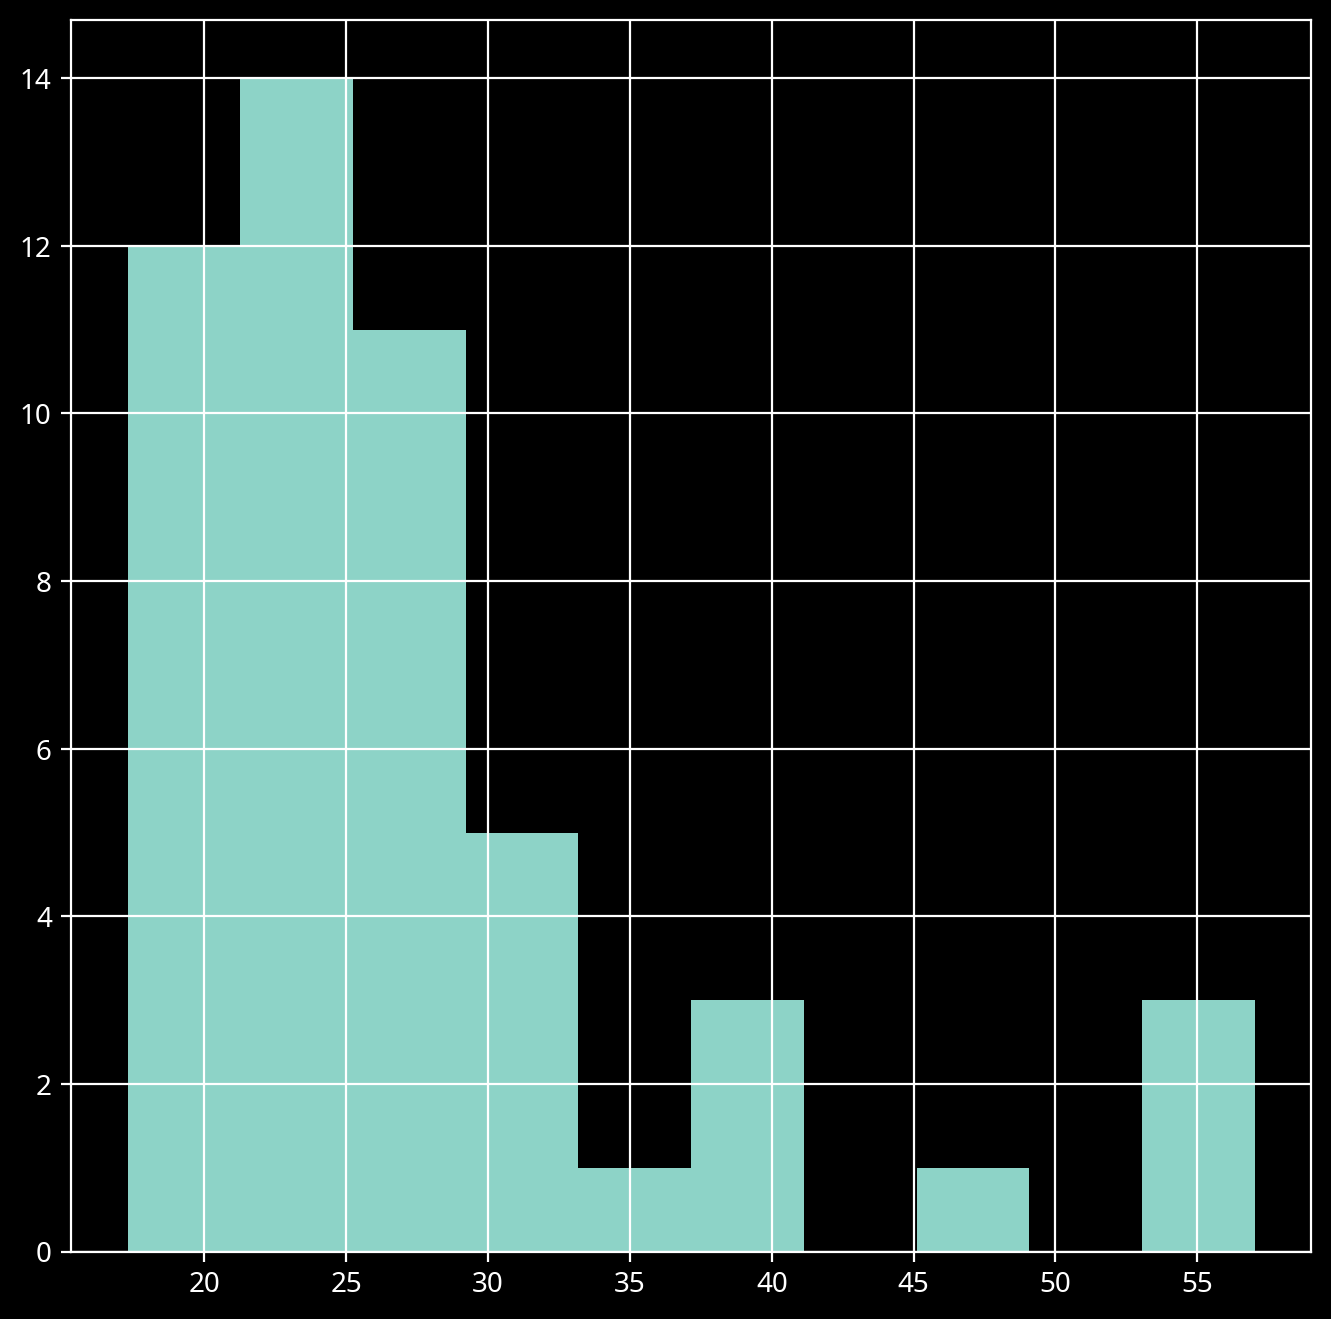

In [75]:
df_state_high_lows['CAGR'].hist(figsize=(8,8))

<AxesSubplot:title={'center':'Compound Annual Growth Rate'}, xlabel='CAGR (%)'>

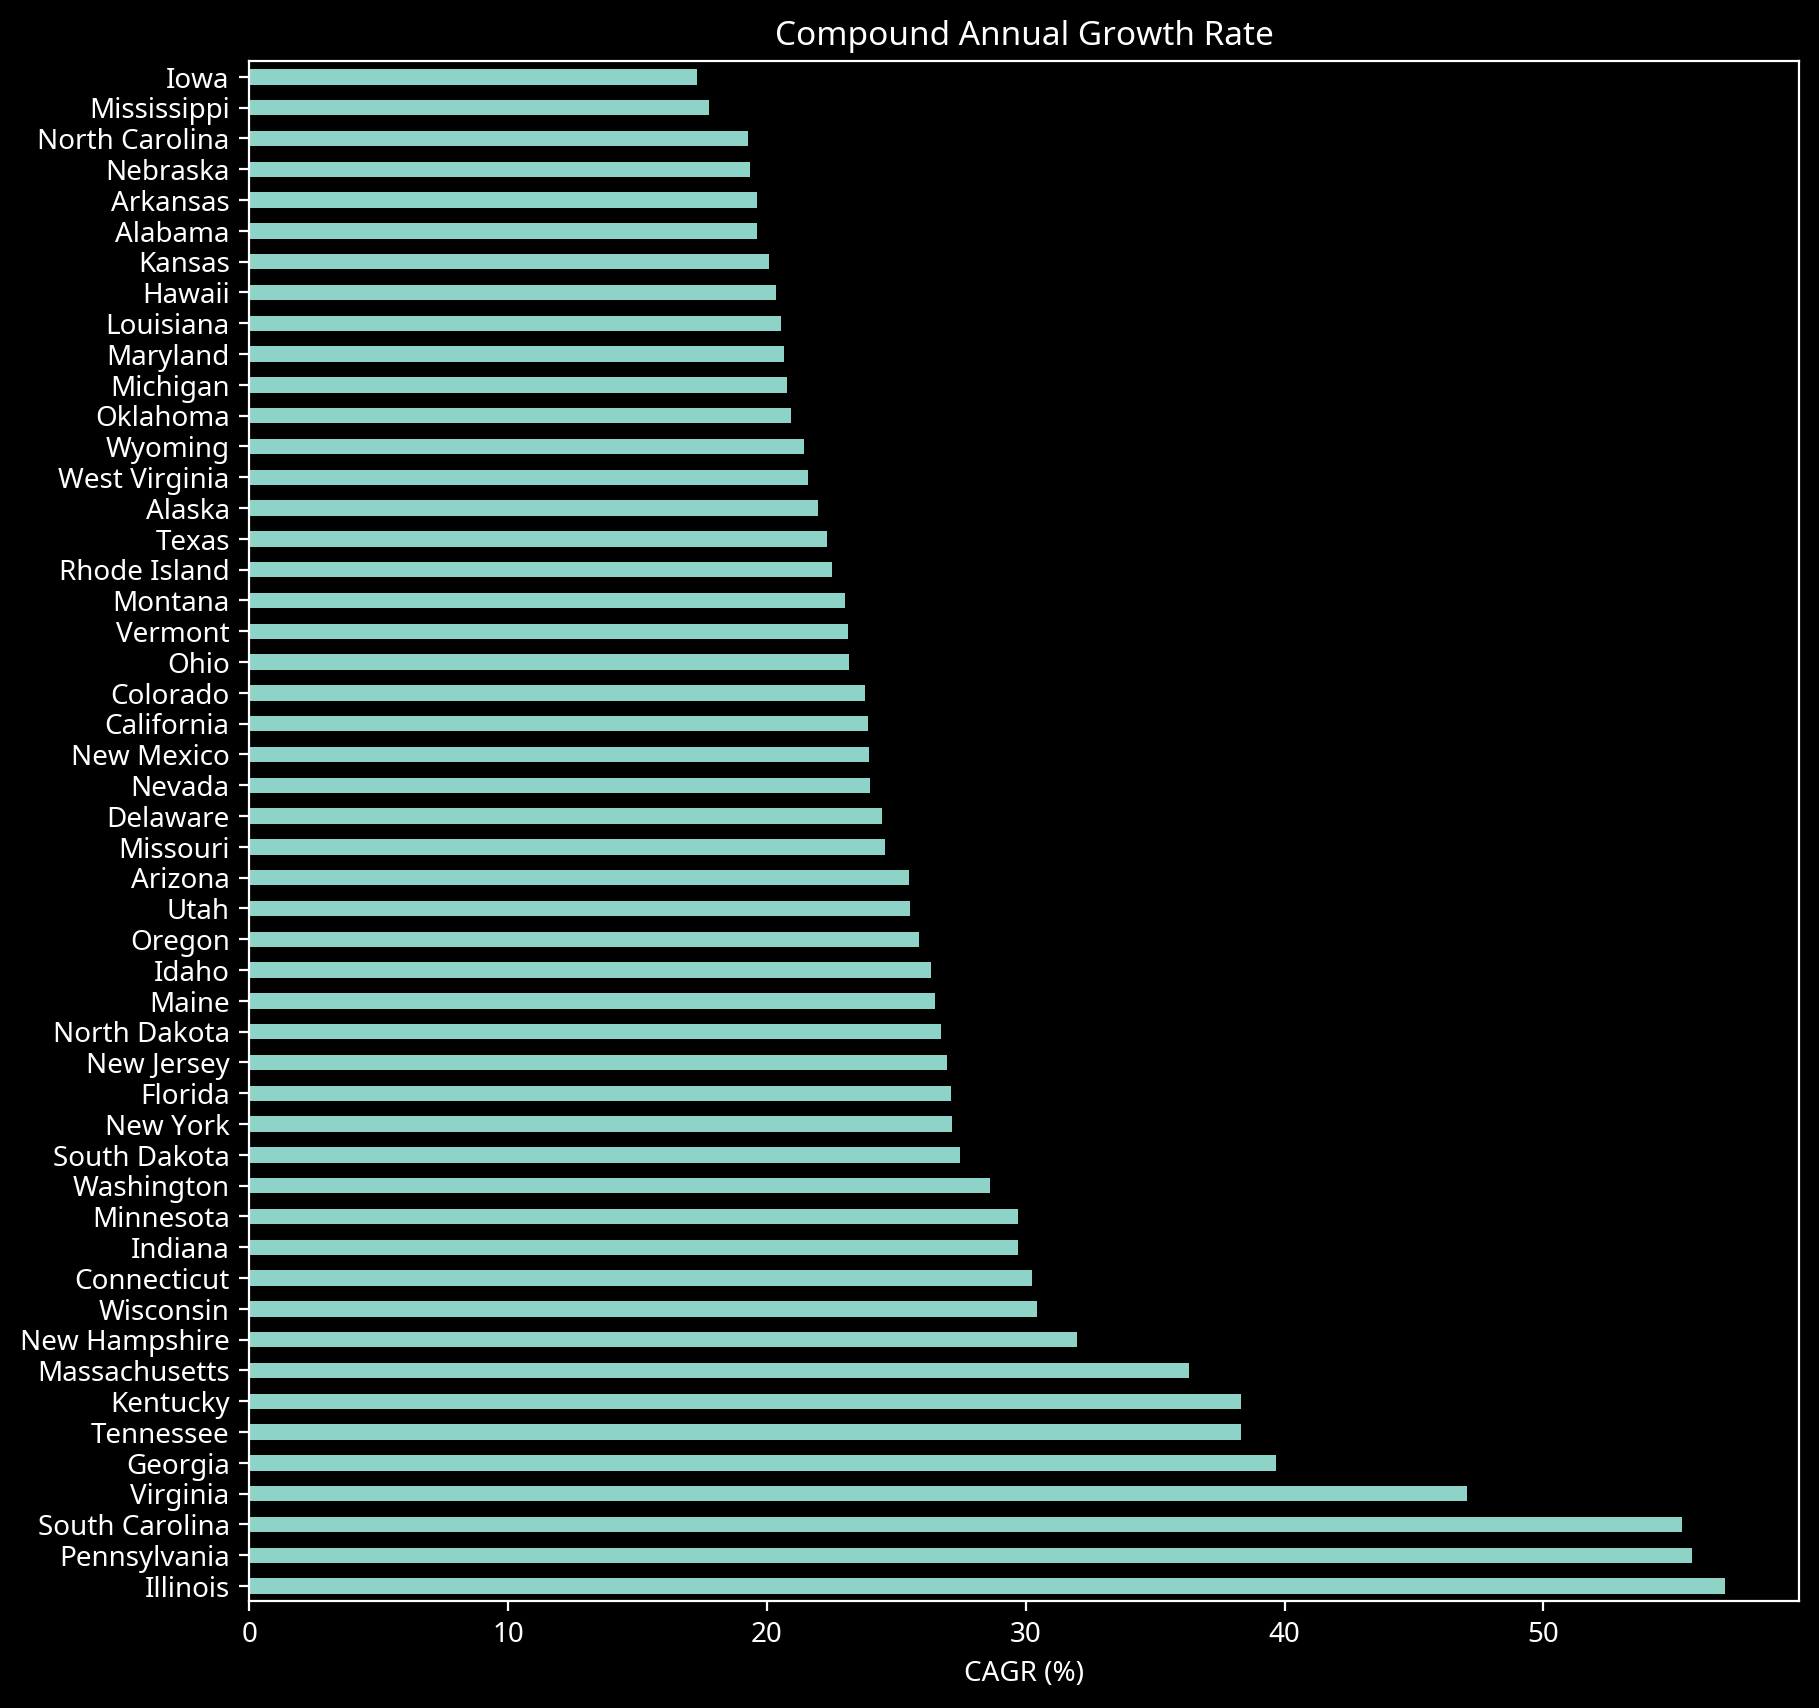

In [76]:
df_state_high_lows['CAGR'].sort_values(ascending=False).plot(kind='barh', figsize=(10,10), xlabel='CAGR (%)', title='Compound Annual Growth Rate')

<AxesSubplot:xlabel='month'>

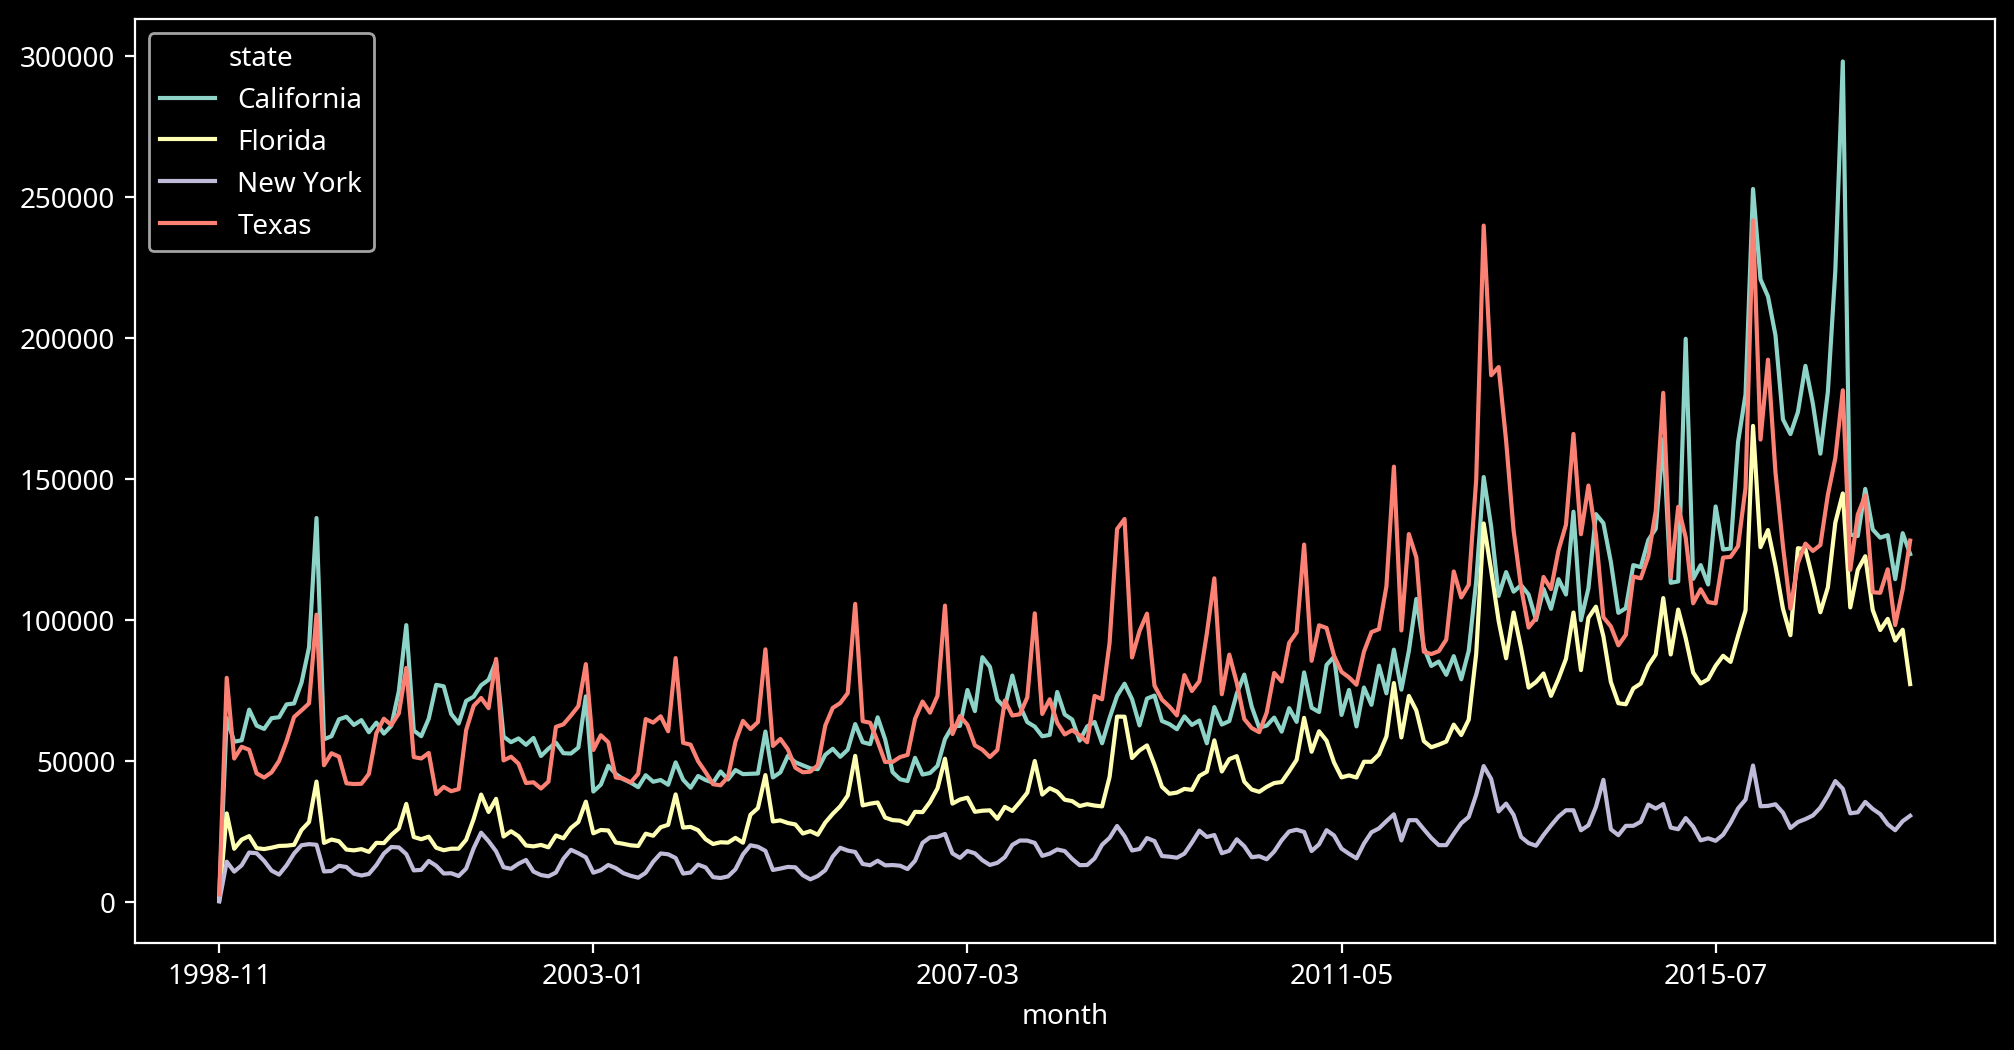

In [77]:
df_gun_q2[df_gun_q2['state'].isin(['Texas','California','Florida', 'New York'])] \
    .groupby(['month','state'])['totals'].sum().unstack().plot(figsize=(12,6))